# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet("tracks.parquet")
catalog_names = pd.read_parquet("catalog_names.parquet")
interactions = pd.read_parquet("interactions.parquet")

KeyboardInterrupt: 

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
unseen_tracks = set(interactions["track_id"]) - set(tracks['track_id'])

In [5]:
unseen_tracks

set()

In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [6]:
tracks = tracks.explode(['albums']).explode(['artists']).explode(['genres']).dropna()


In [40]:
tracks

,track_id,albums,artists,genres
0,26,3,16,11
0,26,3,16,21
0,26,2490753,16,11
0,26,2490753,16,21
1,38,3,16,11
...,...,...,...,...
999997,101493057,21403883,11865715,75
999998,101495927,21404975,4462686,3
999998,101495927,21404975,4462686,75
999999,101521819,21414638,5056591,3


In [15]:
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [7]:
catalog_names

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack
...,...,...,...
1812466,101478482,track,На лицо
1812467,101490148,track,Без капли мысли
1812468,101493057,track,SKITTLES
1812469,101495927,track,Москва


In [8]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [16]:
# Проверка наличия пустых значений
print("\nПустые значения в 'tracks':")
print(tracks.isna().sum())
print("\nПустые значения в 'catalog_names':")
print(catalog_names.isna().sum())
print("\nПустые значения в 'interactions':")
print(interactions.isna().sum())


Пустые значения в 'tracks':
track_id    0
albums      0
artists     0
genres      0
dtype: int64

Пустые значения в 'catalog_names':
id      0
type    0
name    0
dtype: int64

Пустые значения в 'interactions':
user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64


In [17]:
# Проверка уникальности идентификаторов
print("\nУникальные значения в 'tracks':")
print(tracks.nunique())
print("\nУникальные значения в 'catalog_names':")
print(catalog_names.nunique())
print("\nУникальные значения в 'interactions':")
print(interactions.nunique())


Уникальные значения в 'tracks':
track_id    980977
albums      653563
artists     152785
genres         166
dtype: int64

Уникальные значения в 'catalog_names':
id      1776697
type          4
name     945118
dtype: int64

Уникальные значения в 'interactions':
user_id       1373221
track_id      1000000
track_seq       16637
started_at        365
dtype: int64


In [5]:
list_items = ["album","artist", "genre" ]
for item in list_items:
    print(f"Нет в справочнике из каталога {item}: ", end='')
    exists = (
    set(tracks[item+'s'].drop_duplicates()) 
    - set(catalog_names.query(f'type == "{item}"')['id'])
)
    print(len(exists))
    print('Такие елементы отсутвуют: ', exists)

Нет в справочнике из каталога album: 0
Такие елементы отсутвуют:  set()
Нет в справочнике из каталога artist: 0
Такие елементы отсутвуют:  set()
Нет в справочнике из каталога genre: 30
Такие елементы отсутвуют:  {130, 131, 132, 133, 134, 135, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 124, 126}


In [7]:
non_exist_genres = {130, 131, 132, 133, 134, 135, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 124, 126}

In [8]:
track_unknown_genres = tracks\
                        .query('genres in @non_exist_genres') \
                        ['track_id']\
                        .drop_duplicates()

tracks_unique = tracks['track_id'].drop_duplicates()

percent_non_exist_genres = len(track_unknown_genres) / len(tracks_unique) * 100
print(f"текров где непонятен жанр: {percent_non_exist_genres:.1f}%")


текров где непонятен жанр: 4.9%


In [9]:
tracks = tracks.query('track_id not in @track_unknown_genres').reset_index(drop=True)

In [13]:
unseen_tracks = set(interactions["track_id"]) - set(tracks['track_id'])

In [14]:
interactions = interactions.query('track_id not in @unseen_tracks').reset_index(drop=True)

In [18]:
tracks

,track_id,albums,artists,genres
0,26,3,16,11
1,26,3,16,21
2,26,2490753,16,11
3,26,2490753,16,21
4,38,3,16,11
...,...,...,...,...
6250606,101493057,21403883,11865715,75
6250607,101495927,21404975,4462686,3
6250608,101495927,21404975,4462686,75
6250609,101521819,21414638,5056591,3


In [15]:
interactions

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
...,...,...,...,...
214720733,1374582,95514767,288,2022-12-29
214720734,1374582,97220301,289,2022-12-29
214720735,1374582,97241171,290,2022-12-29
214720736,1374582,98542641,291,2022-12-29


In [16]:
214720738/215166187

0.9979297444165798

In [12]:
len(unseen_tracks)

19023

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

Особо явных проблем не выявила. Только небольшой процент треков с неизвестным жанром, принято решение удалить
преобразовала только листы разложила, для более удобного использования. 

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

Посмотрим на распределение количества прослушанных треков для каждого пользователя.

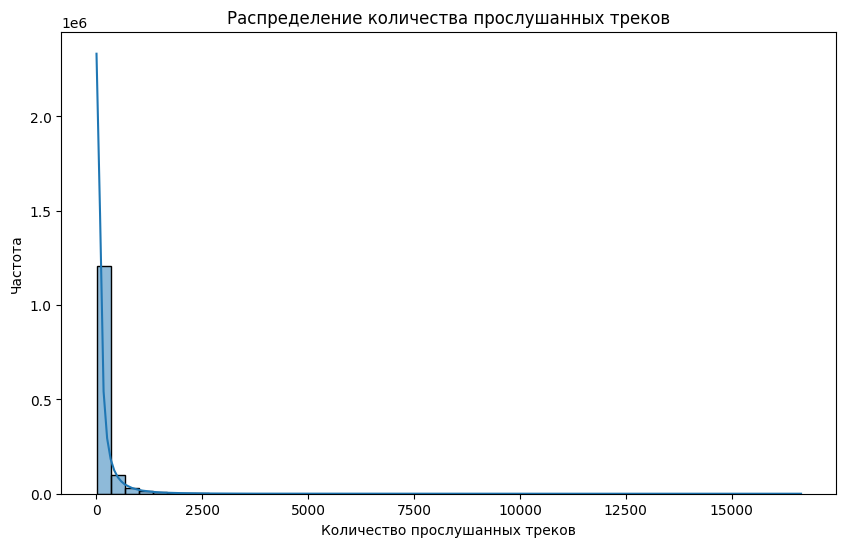

In [17]:
# Подсчёт количества прослушанных треков для каждого пользователя
user_track_counts = interactions.groupby("user_id").size()

# График распределения количества прослушанных треков
plt.figure(figsize=(10, 6))
sns.histplot(user_track_counts, bins=50, kde=True)
plt.title("Распределение количества прослушанных треков")
plt.xlabel("Количество прослушанных треков")
plt.ylabel("Частота")
plt.show()

Наиболее популярные треки

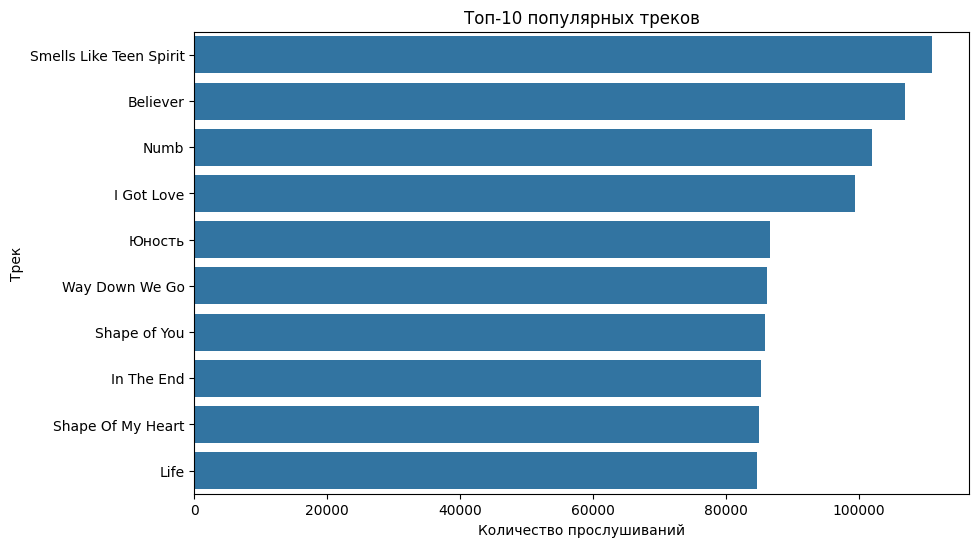

In [24]:
# Подсчёт количества прослушиваний для каждого трека
track_popularity = interactions.groupby("track_id").size().sort_values(ascending=False)

# Топ-10 популярных треков
top_10_tracks = track_popularity.head(10).reset_index()
result = pd.merge(top_10_tracks,
                   catalog_names[catalog_names["type"] == "track"], 
                   left_on="track_id", right_on="id", how="inner")

# График топ-10 популярных треков
plt.figure(figsize=(10, 6))
sns.barplot(x=result[0], y=result["name"])
plt.title("Топ-10 популярных треков")
plt.xlabel("Количество прослушиваний")
plt.ylabel("Трек")
plt.show()


Наиболее популярные жанры

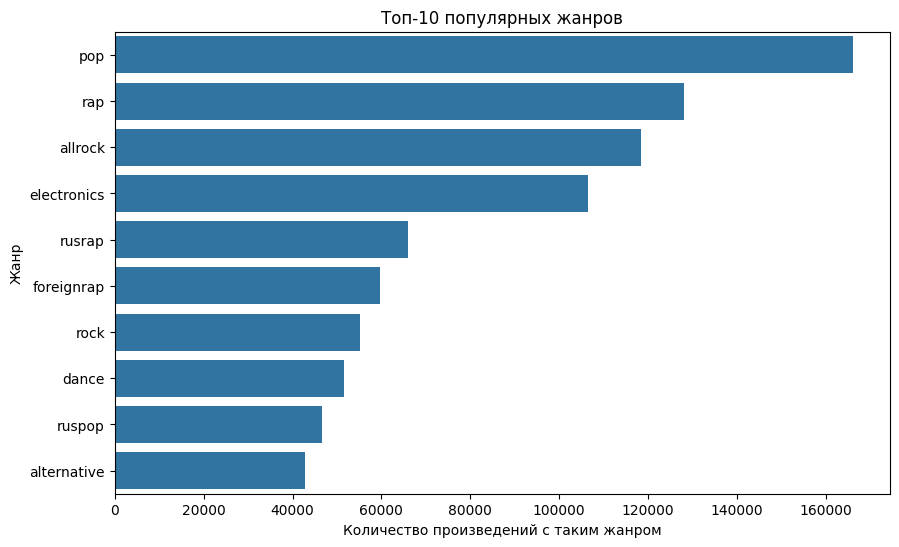

In [19]:

# Подсчёт количества прослушиваний для каждого жанра
unique_tracks = tracks[["genres", 'track_id']].drop_duplicates()
genre_popularity = unique_tracks.groupby("genres").size().sort_values(ascending=False)

# Топ-10 популярных жанров
top_10_genres = genre_popularity.head(10).reset_index()
result = pd.merge(top_10_genres,
                   catalog_names[catalog_names["type"] == "genre"], 
                   left_on="genres", right_on="id", how="inner")

# График топ-10 популярных жанров
plt.figure(figsize=(10, 6))
sns.barplot(x=result[0], y=result["name"])
plt.title("Топ-10 популярных жанров")
plt.xlabel("Количество произведений с таким жанром")
plt.ylabel("Жанр")
plt.show()


Треки, которые никто не прослушал

In [30]:
# Найдём треки, которые не были прослушаны
unlistened_tracks = tracks[~tracks["track_id"].isin(interactions["track_id"])]

print(f"Количество треков, которые никто не прослушал: {len(unlistened_tracks)}")

Количество треков, которые никто не прослушал: 0


In [4]:
interactions

35                                                2022-11-02 00:00:00
34                                                2022-12-15 00:00:00
34                                                2022-10-01 00:00:00
122                                               2022-07-04 00:00:00
376                                               2022-08-20 00:00:00
                                          ...                        
1305                                              2022-11-08 00:00:00
155                                               2022-10-11 00:00:00
232                                               2022-12-24 00:00:00
201                                               2022-07-08 00:00:00
started_at_month    35      2022-11-01
34      2022-12-01
34      ...
Name: started_at, Length: 1000001, dtype: object

In [6]:
from pandas.tseries.offsets import MonthEnd
import pandas as pd
interactions = pd.read_parquet("interactions.parquet").sample(1000000)
interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()
interactions_by_month

,started_at_month,events,users
0,2022-01-01,10804,7713
1,2022-02-01,20243,15803
2,2022-03-01,34507,27306
3,2022-04-01,46106,36928
4,2022-05-01,61258,49062
5,2022-06-01,73045,59242
6,2022-07-01,90548,72820
7,2022-08-01,107837,86874
8,2022-09-01,120735,97793
9,2022-10-01,142992,114343


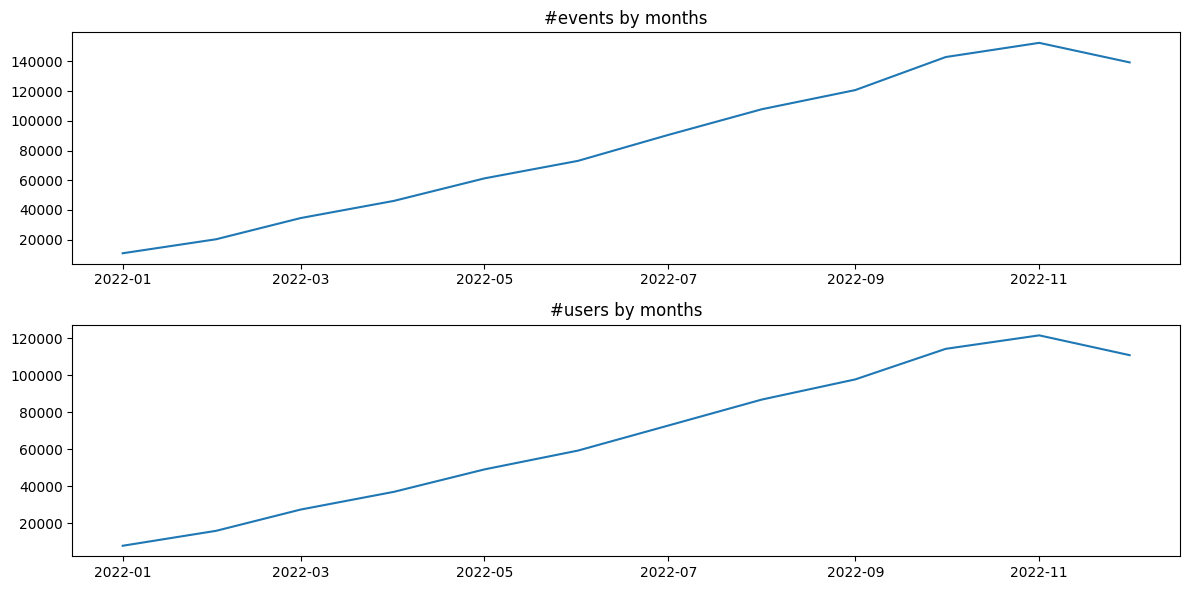

In [9]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобразование данных

In [17]:
def join_and_add_name(tracks, catalog_names, key, new_column_name, type_filter):
    filtered_catalog = catalog_names[catalog_names["type"] == type_filter]
    merged = tracks.merge(filtered_catalog, left_on=key, right_on="id", how="left")
    merged = merged.drop(columns=["id", "type"]).rename(columns={"name": new_column_name})
    return merged
# Джойн для albums
tracks = join_and_add_name(tracks, catalog_names, "albums", "albums_name", "album")

# Джойн для artists
tracks = join_and_add_name(tracks, catalog_names, "artists", "artists_name", "artist")

# Джойн для genres
tracks = join_and_add_name(tracks, catalog_names, "genres", "genres_name", "genre")

# Печать результата
print(tracks)

          track_id    albums   artists genres      albums_name  \
0               26         3        16     11  Taller Children   
1               26         3        16     21  Taller Children   
2               26   2490753        16     11  Taller Children   
3               26   2490753        16     21  Taller Children   
4               38         3        16     11  Taller Children   
...            ...       ...       ...    ...              ...   
6250606  101493057  21403883  11865715     75         SKITTLES   
6250607  101495927  21404975   4462686      3           Москва   
6250608  101495927  21404975   4462686     75           Москва   
6250609  101521819  21414638   5056591      3           Вокзал   
6250610  101521819  21414638   5056591     75           Вокзал   

                     artists_name genres_name  
0        Elizabeth & the Catapult         pop  
1        Elizabeth & the Catapult        folk  
2        Elizabeth & the Catapult         pop  
3        Elizab

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [18]:
tracks.to_parquet("items.parquet")
interactions.to_parquet("events.parquet")

In [13]:
import os
import sys

import boto3
from dotenv import load_dotenv
load_dotenv()

True

In [14]:
client = boto3.client(
            service_name='s3',
            endpoint_url='https://storage.yandexcloud.net',
            aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
            aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY')
        )
bucket = os.getenv('S3_BUCKET_NAME')

In [14]:
client.upload_file('items.parquet', bucket, 'recsys/data/items.parquet')
client.upload_file('events.parquet', bucket, 'recsys/data/events.parquet')

In [22]:
objects = client.list_objects_v2(Bucket=bucket)['Contents']
for obj in objects:
    if 'recsys' in obj['Key']:
        print(obj)

{'Key': 'recsys/data/events.parquet', 'LastModified': datetime.datetime(2024, 9, 1, 7, 47, 58, 129000, tzinfo=tzlocal()), 'ETag': '"e67d5861d9f8c7558489ba81955d0e09-123"', 'Size': 1028168763, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'}}
{'Key': 'recsys/data/items.parquet', 'LastModified': datetime.datetime(2024, 9, 1, 7, 47, 53, 994000, tzinfo=tzlocal()), 'ETag': '"8640ce97fb4356edaf634523e6ffca63-8"', 'Size': 63731499, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'}}


# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [23]:
del tracks
del interactions

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [4]:
items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")



In [25]:
catalog_names = pd.read_parquet("catalog_names.parquet")

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [5]:
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

# Количество пользователей, которые есть и в train, и в test
common_users = users_train[users_train.isin(users_test)]

print(len(users_train), len(users_test), len(common_users)) 

1341269 778789 748016


In [7]:
del items
del events

In [30]:
events_train

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
...,...,...,...,...
215166097,1374582,76512143,203,2022-12-15
215166098,1374582,76820953,204,2022-12-15
215166099,1374582,77549370,205,2022-12-15
215166100,1374582,77590298,206,2022-12-15


#### Функции

In [3]:
def calculate_precision_recall(test_data, recommendations, top_k=5):
    # Устанавливаем метку 'gt' для событий в тестовых данных
    test_data["gt"] = True
    
    # Находим пересечение пользователей в тестовых данных и рекомендациях
    common_users = set(test_data["user_id"].unique()) & set(recommendations["user_id"].unique())
    
    test_data_common_users = test_data[test_data["user_id"].isin(common_users)].copy()
    recommendations_common_users = recommendations[recommendations["user_id"].isin(common_users)].copy()

    recommendations_common_users = recommendations_common_users.sort_values(by=["user_id", "score"], ascending=[True, False])

    # Оставляем только top_k рекомендаций для каждого пользователя
    if top_k is not None:
        recommendations_common_users = recommendations_common_users.groupby("user_id").head(top_k)
        
    # Объединяем тестовые данные и рекомендации
    merged_data = test_data_common_users[["user_id", "track_id", "gt"]].merge(
        recommendations_common_users[["user_id", "track_id", "score"]], 
        on=["user_id", "track_id"], how="outer"
    )
    
    # Заполняем пропуски в 'gt' значением False
    merged_data["gt"] = merged_data["gt"].fillna(False)

    # Устанавливаем метку 'pr' для предсказанных событий
    merged_data["pr"] = merged_data["score"].notnull()
    
    merged_data["tp"] = merged_data["gt"] & merged_data["pr"]
    merged_data["fp"] = ~merged_data["gt"] & merged_data["pr"]
    merged_data["fn"] = merged_data["gt"] & ~merged_data["pr"]

    grouped_data = merged_data.groupby("user_id")

    # Точность = tp / (tp + fp)
    precision = grouped_data["tp"].sum() / (grouped_data["tp"].sum() + grouped_data["fp"].sum())
    precision = precision.fillna(0).mean()
    precision = round(precision, 4) * 100
    
    # Полнота = tp / (tp + fn)
    recall = grouped_data["tp"].sum() / (grouped_data["tp"].sum() + grouped_data["fn"].sum())
    recall = recall.fillna(0).mean()
    recall = round(recall, 4) * 100

    return precision, recall
def calculate_coverage(recommendations, all_tracks):
    unique_tracks_in_recs = recommendations['track_id'].nunique()
    total_available_tracks = len(all_tracks)
    coverage_ratio = unique_tracks_in_recs / total_available_tracks
    coverage_percentage = round(coverage_ratio, 4) * 100
    
    return coverage_percentage
def calculate_novelty(recommendations, training_data, top_k=5):
    # Оставляем только top_k рекомендаций для каждого пользователя
    top_recommendations = (
        recommendations
        .sort_values(by=['user_id', 'score'], ascending=[True, False])
        .groupby('user_id')
        .head(top_k)
        .reset_index(drop=True)
        .copy()
    )

    # Фильтруем обучающие данные, оставляя только тех пользователей и треки, которые присутствуют в рекомендациях
    filtered_training_data = (
        training_data[
            training_data['user_id'].isin(top_recommendations['user_id']) &
            training_data['track_id'].isin(top_recommendations['track_id'])
        ]
        [['user_id', 'track_id']]
        .reset_index(drop=True)
        .copy()
    )

    # Помечаем события, которые уже известны пользователю
    filtered_training_data['known'] = False

    # Добавляем метку 'known' к рекомендациям
    top_recommendations = top_recommendations.merge(
        filtered_training_data[['user_id', 'track_id', 'known']],
        on=['user_id', 'track_id'],
        how='left'
    )
    top_recommendations['known'] = top_recommendations['known'].fillna(True).astype(bool)
    novelty_ratio = top_recommendations.groupby('user_id')['known'].mean().mean()
    novelty_percentage = round(novelty_ratio, 4) * 100

    return novelty_percentage


# Топ популярных

#### Расчет

Рассчитаем рекомендации как топ популярных.

In [27]:
cold_users = users_test[~users_test.isin(users_train)]
print(len(cold_users)) 

30773


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
k = 100
item_popularity = events_train \
    .groupby("track_id").agg(score=("user_id", "nunique")).reset_index()
# Сортируем по убыванию
top_k_pop_items = item_popularity.sort_values(by="score", ascending=False).head(k)
top_k_pop_items["score"]  = scaler.fit_transform(top_k_pop_items[['score']])

print(top_k_pop_items)

        track_id     score
8215       53404  1.000000
451664  33311009  0.857486
24433     178529  0.854142
478765  35505245  0.769064
341295  24692821  0.588016
...          ...       ...
792889  68562711  0.005780
842992  75944934  0.004952
841718  75642961  0.003392
393678  29175370  0.001513
791486  68348389  0.000000

[100 rows x 2 columns]


In [29]:
top_popular = (
    events_test[['user_id']]
    .drop_duplicates()
    .reset_index(drop=True)
    .merge(top_k_pop_items, how='cross')
    .reset_index(drop=True)
)
top_popular

,user_id,track_id,score
0,3,53404,1.000000
1,3,33311009,0.857486
2,3,178529,0.854142
3,3,35505245,0.769064
4,3,24692821,0.588016
...,...,...,...
77878895,1374582,68562711,0.005780
77878896,1374582,75944934,0.004952
77878897,1374582,75642961,0.003392
77878898,1374582,29175370,0.001513


In [30]:
top_k_pop_items.to_parquet('top_popular.parquet')

In [32]:
precision, recall = calculate_precision_recall(events_test, top_popular)
coverage = calculate_coverage(top_popular, items)
novelty = calculate_novelty(top_popular, events_train)
top_popular_metrics = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'Coverage', 'Novelty'],
        'Value': [precision, recall, coverage, novelty]
    })
top_popular_metrics

/tmp/ipykernel_2450/2117868057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["gt"] = True


,Metric,Value
0,Precision,0.36
1,Recall,0.13
2,Coverage,0.00
3,Novelty,92.62


In [31]:
top_popular.to_parquet('top_popular.parquet')
client.upload_file('top_popular.parquet', bucket, 'recsys/recommendations/top_popular.parquet')

Метрики в целом низкие, мало рекомендуем релевантного и преимущественно нового.
Но в целом при выборе просто 100 популярных - ожидаемо

# Персональные

Рассчитаем персональные рекомендации.

In [8]:
import scipy
import sklearn.preprocessing

# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["track_id"])
items["track_id_enc"] = item_encoder.transform(items["track_id"])
events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test["track_id_enc"] = item_encoder.transform(events_test["track_id"])

/tmp/ipykernel_2729/1913820112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_2729/1913820112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_2729/1913820112.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [34]:
events_train

,user_id,track_id,track_seq,started_at,user_id_enc,track_id_enc
0,0,99262,1,2022-07-17,0,14842
1,0,589498,2,2022-07-19,0,55479
2,0,590262,3,2022-07-21,0,55952
3,0,590303,4,2022-07-22,0,55975
4,0,590692,5,2022-07-22,0,56200
...,...,...,...,...,...,...
214720648,1374582,76512143,203,2022-12-15,1372041,845093
214720649,1374582,76820953,204,2022-12-15,1372041,846339
214720650,1374582,77549370,205,2022-12-15,1372041,849933
214720651,1374582,77590298,206,2022-12-15,1372041,850081


In [36]:
events_train['track_id_enc'].max()

932663

In [5]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    np.ones(len(events_train)),
    (events_train['user_id_enc'], events_train['track_id_enc'])),
    dtype=np.int8)

In [39]:
import sys

sum([sys.getsizeof(i) for i in user_item_matrix_train.data])/1024**3

4.684656392782927

In [41]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-airflow/.venv_project_name/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/mle_projects/mle-airflow/.venv_project_name/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [1:34:30<00:00, 113.42s/it]


In [42]:
import pickle
with open('models/als_model.pkl', 'wb') as f:
       pickle.dump(als_model, f)

In [7]:
import pickle
with open('models/als_model.pkl', 'rb') as f:
    als_model = pickle.load(f)

/home/mle-user/mle_projects/mle-airflow/.venv_project_name/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=10)

In [9]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "track_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["track_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["track_id_enc"] = als_recommendations["track_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["track_id"] = item_encoder.inverse_transform(als_recommendations["track_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "track_id_enc"])

In [17]:
precision, recall = calculate_precision_recall(events_test, als_recommendations)
coverage = calculate_coverage(als_recommendations, items)
novelty = calculate_novelty(als_recommendations, events_train)
als_recommendations_metrics = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'Coverage', 'Novelty'],
        'Value': [precision, recall, coverage, novelty]
    })
als_recommendations_metrics

/tmp/ipykernel_2047/2117868057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["gt"] = True


,Metric,Value
0,Precision,0.69
1,Recall,0.57
2,Coverage,0.05
3,Novelty,62.95


In [15]:
als_recommendations.to_parquet('als_recommendations.parquet')
client.upload_file('als_recommendations.parquet', bucket, 'recsys/recommendations/als_recommendations.parquet')

В целом стали метрики лучше чем с топ 100, но есть куда расти, можно поиграться с параметрами обучения и рекомендации еще, но данных безумно много, каждый расчет занимает очень много времени 

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [9]:
import pickle
with open('models/als_model.pkl', 'rb') as f:
    als_model = pickle.load(f)

/home/mle-user/mle_projects/mle-airflow/.venv_project_name/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
len(item_encoder.classes_)

932664

In [11]:
item_ids_encoded = range(len(item_encoder.classes_))
als_I2I_recommendations = als_model.similar_items(
    item_ids_encoded, N=10)

In [12]:
# преобразуем полученные рекомендации в табличный формат
I2I_item_ids_enc = als_I2I_recommendations[0]
I2I_als_scores = als_I2I_recommendations[1]

als_I2I_recommendations = pd.DataFrame({
    "item_ids_encoded": item_ids_encoded,
    "track_ids_recommended": I2I_item_ids_enc.tolist(), 
    "score": I2I_als_scores.tolist()})
als_I2I_recommendations = als_I2I_recommendations.explode(["track_ids_recommended", "score"], ignore_index=True)


In [13]:
als_I2I_recommendations.to_parquet('als_I2I_recommendations.parquet')
client.upload_file('als_I2I_recommendations.parquet', bucket, 'recsys/recommendations/als_I2I_recommendations.parquet')

# Построение признаков

1. track_popularity - популярности прослушивания трека среди уникальных пользователей
2. track_position - среднее положение трека в истории пользователей
3. user_history_max - как много человек в целом слушает треков

#### 1. track_popularity

In [5]:
# Функция для расчета  популярности
def get_item_popularity(events: pd.DataFrame,item_name):

    item_popularity = (
        events
        .groupby(item_name)
        .agg(popularity=('user_id', 'count'))
        .reset_index()
        .sort_values(by='popularity', ascending=False, ignore_index=True)
        .reset_index(drop=True)
    )
    item_popularity['popularity'] /= item_popularity['popularity'].max()
    item_popularity['popularity'] = (
        item_popularity['popularity'].astype('float32')
    )
    return item_popularity
track_popularity = get_item_popularity(events_train, 'track_id')

#### 2. track_position

In [6]:
# Функция для посчета позиции в истории
def get_item_position(events: pd.DataFrame, item_name):
    
    item_position = (
        events
        .groupby(item_name)
        .agg(position=('track_seq', 'mean'))
        .reset_index()
        .sort_values(by='position', ascending=False, ignore_index=True)
        .reset_index(drop=True)
    )
    item_position['position'] /= item_position['position'].max()
    item_position['position'] = (
        item_position['position'].astype('float32')
    )
    return item_position
track_position = get_item_position(events_train, 'track_id')

#### 3. user_history_max

In [7]:
# Функция для посчета позиции в истории
def get_history_max(events: pd.DataFrame):
    
    history_max = (
        events
        .groupby('user_id')
        .agg(history_max=('track_seq', 'max'))
        .reset_index()
        .sort_values(by='history_max', ascending=False, ignore_index=True)
        .reset_index(drop=True)
    )
    return history_max
user_history_max = get_history_max(events_train)

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [7]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-24")

split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()

# Вторая часть данных для новой тестовой выборки
events_test_2 = events_test[~split_date_for_labels_idx].copy()
(len(events_labels), len(events_test_2))


(8113111, 5403167)

In [5]:
# загружаем рекомендации 
top_popular = pd.read_parquet("top_popular.parquet")
als_recommendations = pd.read_parquet("als_recommendations.parquet")


candidates = pd.merge(
    als_recommendations[["user_id", "track_id", "score"]].rename(columns={"score": "als_score"}),
    top_popular[["user_id", "track_id", "score"]].rename(columns={"score": "top_score"}),
    on=["user_id", "track_id"],
    how="outer")
candidates.to_parquet("candidates.parquet")

In [9]:
candidates = pd.read_parquet("candidates.parquet")

In [10]:
events_labels["target"] = 1
candidates = candidates.merge(events_labels[["user_id", "track_id", "target"]], 
                              on=["user_id", "track_id"], 
                              how="left")
candidates["target"] = candidates["target"].fillna(0).astype("int")

# в кандидатах оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

# для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0)).reset_index(drop=True)
])

# Печать результата для проверки
print("candidates_for_train:")
print(candidates_for_train)

candidates_for_train:
        user_id  track_id  als_score  top_score  target
1384        138  83063895   0.201580   0.083502       1
1620        162   2758009   0.252617   0.463050       1
1624        162  10776533   0.192419        NaN       1
1645        164  10776533   0.259009        NaN       1
2675        267  84382287   0.024372        NaN       1
...         ...       ...        ...        ...     ...
559739  1374574       141   0.000000        NaN       0
559740  1374582  47627256        NaN   0.397112       0
559741  1374582  56920237        NaN   0.031640       0
559742  1374582  69459326   0.216448        NaN       0
559743  1374582  55561798        NaN   0.150666       0

[802684 rows x 5 columns]


In [18]:
candidates_for_train_full = candidates_for_train.merge(track_popularity, on="track_id", how="left")\
                                           .merge(track_position, on="track_id", how="left")\
                                           .merge(user_history_max, on="user_id", how="left")
candidates_for_train_full

,user_id,track_id,als_score,top_score,target,popularity,position,history_max
0,138,83063895,0.201580,0.083502,1,0.476878,0.033332,33.0
1,162,2758009,0.252617,0.463050,1,0.693518,0.014783,23.0
2,162,10776533,0.192419,NaN,1,0.361015,0.022383,23.0
3,164,10776533,0.259009,NaN,1,0.361015,0.022383,53.0
4,267,84382287,0.024372,NaN,1,0.301901,0.035934,11.0
...,...,...,...,...,...,...,...,...
802679,1374574,141,0.000000,NaN,0,0.003108,0.000120,NaN
802680,1374582,47627256,NaN,0.397112,0,0.655881,0.032341,207.0
802681,1374582,56920237,NaN,0.031640,0,0.447276,0.034000,207.0
802682,1374582,69459326,0.216448,NaN,0,0.266910,0.041461,207.0


In [19]:
candidates_for_train_full.to_parquet("candidates_for_train_full.parquet")

In [3]:
from catboost import CatBoostClassifier, Pool

candidates_for_train_full = pd.read_parquet("candidates_for_train_full.parquet")

# задаём имена колонок признаков и таргета
features = ['als_score', 'top_score', 'popularity','position', 'history_max']
target = 'target'

# Create the Pool object
train_data = Pool(
    data=candidates_for_train_full[features], 
    label=candidates_for_train_full[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6430705	total: 139ms	remaining: 2m 19s
100:	learn: 0.3325540	total: 8.8s	remaining: 1m 18s
200:	learn: 0.3204299	total: 17.3s	remaining: 1m 8s
300:	learn: 0.3161719	total: 25.8s	remaining: 59.8s
400:	learn: 0.3135802	total: 35.1s	remaining: 52.4s
500:	learn: 0.3119194	total: 45s	remaining: 44.8s
600:	learn: 0.3106074	total: 53.7s	remaining: 35.7s
700:	learn: 0.3097060	total: 1m	remaining: 26s
800:	learn: 0.3089479	total: 1m 9s	remaining: 17.2s
900:	learn: 0.3083765	total: 1m 15s	remaining: 8.35s
999:	learn: 0.3078508	total: 1m 22s	remaining: 0us


In [4]:
import pickle
with open('models/cb_model.pkl', 'wb') as f:
       pickle.dump(cb_model, f)

In [8]:
import pickle
with open('models/cb_model.pkl', 'rb') as f:
    cb_model = pickle.load(f)

In [9]:
candidates = pd.read_parquet("candidates.parquet")
candidates_to_rank = candidates.merge(track_popularity, on="track_id", how="left")\
                                           .merge(track_position, on="track_id", how="left")\
                                           .merge(user_history_max, on="user_id", how="left")
candidates_to_rank

,user_id,track_id,als_score,top_score,popularity,position,history_max
0,0,597196,0.014727,NaN,0.212468,0.008198,26.0
1,0,29213451,0.012848,NaN,0.371240,0.021472,26.0
2,0,27077792,0.012039,NaN,0.244061,0.015435,26.0
3,0,21101463,0.010868,NaN,0.142739,0.025628,26.0
4,0,18860,0.010672,NaN,0.386118,0.001132,26.0
...,...,...,...,...,...,...,...
88097662,1374582,68562711,NaN,0.005780,0.432516,0.033990,207.0
88097663,1374582,75944934,NaN,0.004952,0.432043,0.046934,207.0
88097664,1374582,75642961,NaN,0.003392,0.431153,0.037072,207.0
88097665,1374582,29175370,NaN,0.001513,0.430080,0.014722,207.0


In [10]:
del track_popularity
del track_position
del user_history_max
del candidates

In [11]:
from catboost import  Pool
features = ['als_score', 'top_score', 'popularity','position', 'history_max']
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)
candidates_to_rank["cb_score"] = predictions[:, 1]

In [12]:
del inference_data
del predictions

In [13]:

# для каждого пользователя проставляем rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank["rank"] = candidates_to_rank.groupby('user_id').cumcount() + 1

max_recommendations_per_user = 100
final_recommendations = candidates_to_rank.query("rank <= @max_recommendations_per_user")
final_recommendations.to_parquet("recommendations.parquet")

In [14]:
final_recommendations

,user_id,track_id,als_score,top_score,popularity,position,history_max,cb_score,rank
6,0,19722850,0.010453,NaN,0.234826,0.019989,26.0,0.475304,1
1,0,29213451,0.012848,NaN,0.371240,0.021472,26.0,0.425806,2
2,0,27077792,0.012039,NaN,0.244061,0.015435,26.0,0.424492,3
7,0,25903468,0.010445,NaN,0.221011,0.022327,26.0,0.401995,4
3,0,21101463,0.010868,NaN,0.142739,0.025628,26.0,0.380848,5
...,...,...,...,...,...,...,...,...,...
88097582,1374582,37384,NaN,0.514116,0.722666,0.001562,207.0,0.000340,96
88097623,1374582,595258,NaN,0.142243,0.510407,0.007705,207.0,0.000321,97
88097622,1374582,560473,NaN,0.148278,0.513851,0.007686,207.0,0.000165,98
88097613,1374582,178495,NaN,0.181765,0.532965,0.005347,207.0,0.000115,99


In [1]:
import pandas as pd
renamed_final_recommendations = pd.read_parquet("recommendations.parquet").rename(columns={"cb_score": "score"})
items = pd.read_parquet("items.parquet")

In [8]:
items = pd.read_parquet("items.parquet")

In [9]:

precision, recall = calculate_precision_recall(events_test, renamed_final_recommendations)
coverage = calculate_coverage(renamed_final_recommendations, items)
novelty = calculate_novelty(renamed_final_recommendations, events_train)
final_recommendations_metrics = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'Coverage', 'Novelty'],
        'Value': [precision, recall, coverage, novelty]
    })
final_recommendations_metrics

,Metric,Value
0,Precision,1.00
1,Recall,0.33
2,Coverage,0.05
3,Novelty,84.47


In [15]:
client.upload_file('recommendations.parquet', bucket, 'recsys/recommendations/recommendations.parquet')

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [12]:
# Метрики взяла из конца каждого блока
data = {
    "Name": ["rank","als", "top_100" ],
    "Precision": ["1.00", "0.69", "0.36"],
    "Recall": ["0.33", "0.57", "0.13"],
    "Coverage": ["0.05", "0.05","0.00" ],
    "Novelty": ["97.81", "62.95","92.62"]
}
df = pd.DataFrame(data)

df

,Name,Precision,Recall,Coverage,Novelty
0,rank,1.00,0.33,0.05,97.81
1,als,0.69,0.57,0.05,62.95
2,top_100,0.36,0.13,0.00,92.62


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

Вариант с  топ-популярных треков в качестве рекомендаций требует минимальных ресурсов, но рещультат - маленькие метрики

Персональные рекомендации получились в разы лучше. Но ресурсов и времени требуют сильно больше 

в двухстайдийном подходие сильно улучшить метрики не вышло, гораздо лучше чем с  топ-популярных треков , но хуже чем с персональными рекомендациями, возможно были подобраны не самые лучше доп признаки


Чем лучше получаются метрики, тем больше вычислительных ресурсов требуется

In [16]:
objects = client.list_objects_v2(Bucket=bucket)['Contents']
for obj in objects:
    if 'recsys' in obj['Key']:
        print(obj)

{'Key': 'recsys/data/events.parquet', 'LastModified': datetime.datetime(2024, 9, 1, 11, 20, 58, 400000, tzinfo=tzlocal()), 'ETag': '"e67d5861d9f8c7558489ba81955d0e09-123"', 'Size': 1028168763, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'}}
{'Key': 'recsys/data/items.parquet', 'LastModified': datetime.datetime(2024, 9, 1, 11, 20, 54, 284000, tzinfo=tzlocal()), 'ETag': '"8640ce97fb4356edaf634523e6ffca63-8"', 'Size': 63731499, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'}}
{'Key': 'recsys/recommendations/als_I2I_recommendations.parquet', 'LastModified': datetime.datetime(2024, 9, 1, 13, 7, 38, 990000, tzinfo=tzlocal()), 'ETag': '"f4b50c08de964f4ce0e1ac16d9865845-12"', 'Size': 97501700, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'}}
{'Key': 'recsys/recommendations/als_recommendations.parquet', 'LastModified': 